In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV


df=pd.read_csv('diabetes_dataset.csv')

df

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,...,60.3,88.7,19.1,6.1,Low,3582,NaN,Former,1,1
9996,9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,...,72.3,200.0,37.1,3.5,Low,2206,NaN,Never,1,1
9997,9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,...,69.8,156.1,85.8,4.9,High,3175,Heavy,Former,1,1
9998,9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,...,74.2,110.9,25.3,5.2,High,3478,Moderate,Never,1,0


Data Cleansing

In [ ]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)
df = df.drop_duplicates()


number of duplicate rows:  (0, 21)


In [ ]:
# Checking null values
print(df.isnull().sum())

Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64


In [ ]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

KeyError: 'gender'

**Categorical** Encoding

In [ ]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
df = perform_one_hot_encoding(df, 'gender')

# Perform one-hot encoding on the smoking history variable
df = perform_one_hot_encoding(df, 'smoking_history')

KeyError: 'gender'

Correlation

In [ ]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

KeyError: 'smoking_history'

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

ValueError: could not convert string to float: 'Female'

Normalization

In [ ]:
# value selection and normalization
y = df["diabetes"].values
x_df = df.drop(["diabetes"], axis = 1)
x = (x_df - np.min(x_df))/(np.max(x_df) - np.min(x_df))
x

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.266667,0.000000,0.003333,0.083967,0.022000,0.466667,0.003333,0.000000,0.000000,0.000000,0.0,0.000000,0.003333,0.0
1,0.180000,0.000000,0.000000,0.091067,0.022000,0.266667,0.003333,0.000000,0.003333,0.000000,0.0,0.000000,0.000000,0.0
2,0.093333,0.000000,0.000000,0.091067,0.019000,0.526667,0.000000,0.003333,0.000000,0.000000,0.0,0.000000,0.003333,0.0
3,0.120000,0.000000,0.000000,0.078167,0.016667,0.516667,0.003333,0.000000,0.000000,0.003333,0.0,0.000000,0.000000,0.0
4,0.253333,0.003333,0.003333,0.067133,0.016000,0.516667,0.000000,0.003333,0.000000,0.003333,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.120000,0.000000,0.000000,0.082000,0.016000,0.483333,0.003333,0.000000,0.003333,0.000000,0.0,0.000000,0.000000,0.0
99996,0.006667,0.000000,0.000000,0.057900,0.021667,0.333333,0.003333,0.000000,0.003333,0.000000,0.0,0.000000,0.000000,0.0
99997,0.220000,0.000000,0.000000,0.092767,0.019000,0.516667,0.000000,0.003333,0.000000,0.000000,0.0,0.003333,0.000000,0.0
99998,0.080000,0.000000,0.000000,0.118067,0.013333,0.333333,0.003333,0.000000,0.000000,0.000000,0.0,0.000000,0.003333,0.0


Test Train Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# # Define resampling
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# over = SMOTE(sampling_strategy=0.1)

# under = RandomUnderSampler(sampling_strategy=0.5)
# # Define preprocessor
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']),
#         ('cat', OneHotEncoder(), ['gender', 'smoking_history'])
#     ])

# # Split data into features and target variable
# X = df.drop('diabetes', axis=1)
# y = df['diabetes']
# # Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
# from sklearn.pipeline import Pipeline
# from imblearn.pipeline import Pipeline as imbPipeline

# clf = imbPipeline(steps=[('preprocessor', preprocessor),
#                       ('over', over),
#                       ('under', under),
#                       ('classifier', RandomForestClassifier())])
# # Define the hyperparameters and the values we want to test
# param_grid = {
#     'classifier__n_estimators': [50, 100, 200],
#     'classifier__max_depth': [None, 10, 20],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4]
# }
# # Create Grid Search object
# grid_search = GridSearchCV(clf, param_grid, cv=5)

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# grid_search.fit(x_train, y_train)

# # Print the best parameters
# print("Best Parameters: ", grid_search.best_params_)
# # Predict on the test set using the best model
# y_pred = grid_search.predict(X_test)

# # Evaluate the model
# print("Model Accuracy: ", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# # Plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

ValueError: 
All the 405 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'gender'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_indexing.py", line 364, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'gender'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 430, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 1383, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 993, in fit_transform
    self._validate_column_callables(X)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 552, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_indexing.py", line 372, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg, x, y, cv = k) # uses R^2 as score
print('CV Scores : ',cv_result)
print('CV Average Score : ',np.sum(cv_result) / k)

CV Scores :  [0.35607925 0.359712   0.35354875 0.34527523 0.35592712]
CV Average Score :  0.35410847036859716


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

lr=LogisticRegression().fit(x_train, y_train)
lr_predicted = lr.predict(x_test)

lr_accuracy = lr.score(x_test, y_test)
lr_recall = recall_score(y_test, lr_predicted)
lr_precision = precision_score(y_test, lr_predicted)
print(f"Accuracy:{lr_accuracy},recall:{lr_recall}, percision:{lr_precision}")

Accuracy:0.9395610111307604,recall:0.3915343915343915, percision:0.8398486759142497


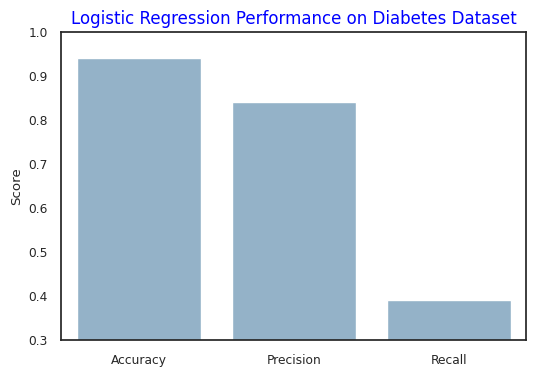

In [ ]:
y_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.figure(figsize=(6, 4))
sns.barplot(x=metrics, y=values)
plt.ylim(.3, 1)
plt.ylabel('Score')
plt.title('Logistic Regression Performance on Diabetes Dataset', color='blue', fontsize=12)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


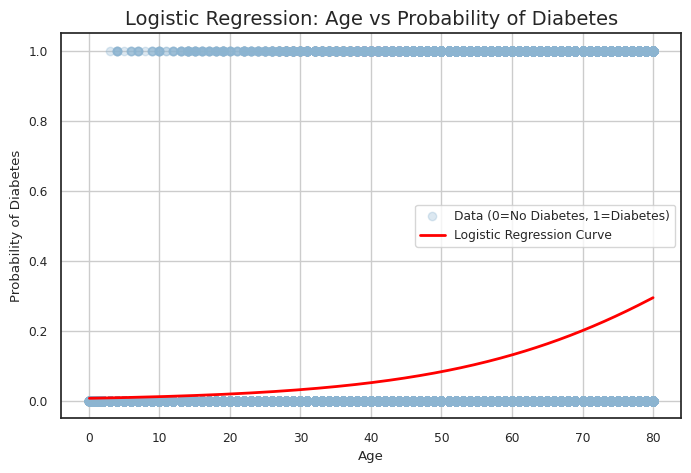

In [ ]:

X = df[['age']]
y = df['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

age_range = np.linspace(X['age'].min(), X['age'].max(), 300).reshape(-1, 1)
age_range_scaled = scaler.transform(age_range)
predicted_prob = model.predict_proba(age_range_scaled)[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(X['age'], y, alpha=0.3, label='Data (0=No Diabetes, 1=Diabetes)')
plt.plot(age_range, predicted_prob, color='red', linewidth=2, label='Logistic Regression Curve')
plt.xlabel('Age')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression: Age vs Probability of Diabetes', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


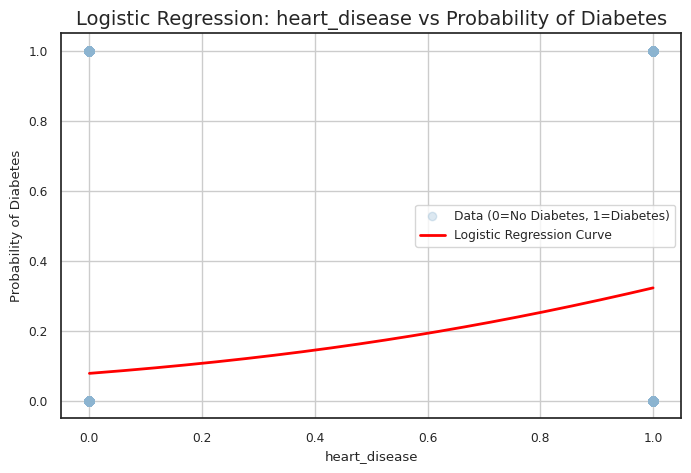

In [ ]:

X = df[['heart_disease']]
y = df['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

age_range = np.linspace(X['heart_disease'].min(), X['heart_disease'].max(), 300).reshape(-1, 1)
age_range_scaled = scaler.transform(age_range)
predicted_prob = model.predict_proba(age_range_scaled)[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(X['heart_disease'], y, alpha=0.3, label='Data (0=No Diabetes, 1=Diabetes)')
plt.plot(age_range, predicted_prob, color='red', linewidth=2, label='Logistic Regression Curve')
plt.xlabel('heart_disease')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression: heart_disease vs Probability of Diabetes', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score


knn = KNeighborsClassifier().fit(x_train, y_train)
knn_predicted = knn.predict(x_test)

knn_accuracy = knn.score(x_test, y_test)
knn_recall = recall_score(y_test, knn_predicted)
knn_precision = precision_score(y_test, knn_predicted)
print(f"Accuracy:{knn_accuracy},recall:{knn_recall}, percision:{knn_precision}")

Accuracy:0.9523561843337147,recall:0.5343915343915344, percision:0.8799612778315585


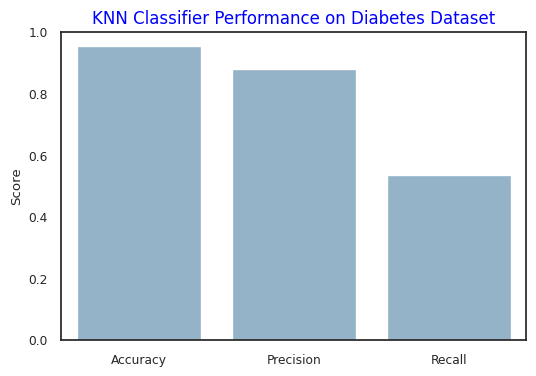

In [ ]:
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.figure(figsize=(6, 4))
sns.barplot(x=metrics, y=values)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('KNN Classifier Performance on Diabetes Dataset', color='blue', fontsize=12)
plt.show()

SVC

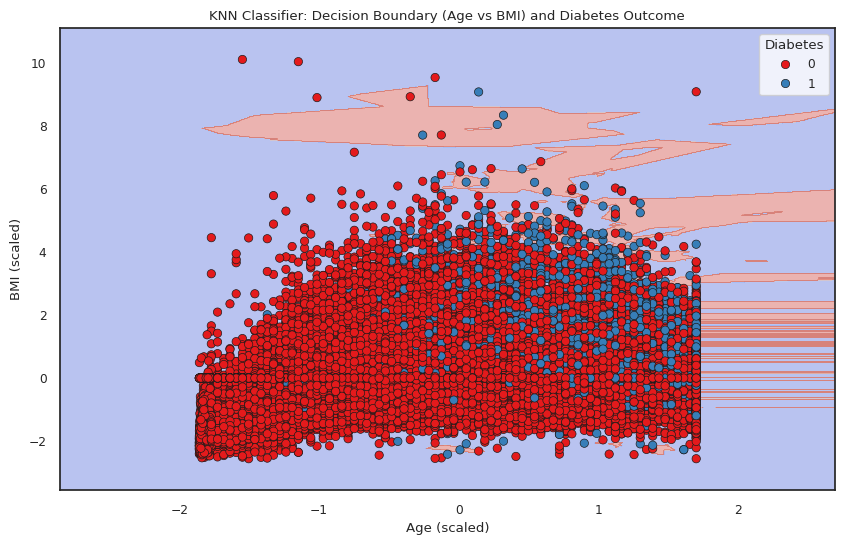

In [ ]:
X = df[['age', 'bmi']]
y = df['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

X = df[['age', 'bmi']]
y = df['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

h = 0.01
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette='Set1', edgecolor='k')
plt.xlabel('Age (scaled)')
plt.ylabel('BMI (scaled)')
plt.title('KNN Classifier: Decision Boundary (Age vs BMI) and Diabetes Outcome')
plt.legend(title='Diabetes')
plt.show()

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score

svm = SVC().fit(x_train, y_train)
svm_predicted = svm.predict(x_test)

svm_accuracy = svm.score(x_test, y_test)
svm_recall = recall_score(y_test, svm_predicted)
svm_precision = precision_score(y_test, svm_predicted)
print(f"Accuracy:{svm_accuracy},recall:{svm_recall}, percision:{svm_precision}")

Accuracy:0.9455424945386456,recall:0.3844797178130511, percision:1.0


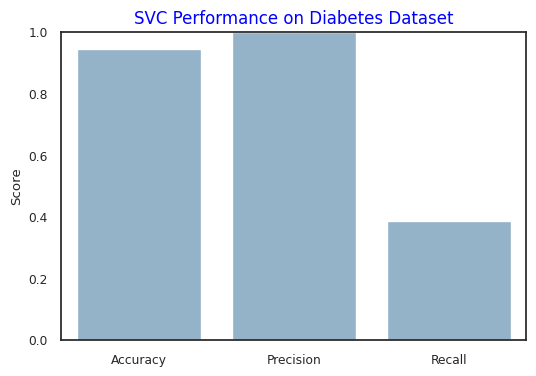

In [ ]:
# Predict
y_pred = svm.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

# Plot all metrics
plt.figure(figsize=(6, 4))
sns.barplot(x=metrics, y=values)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('SVC Performance on Diabetes Dataset', color='blue', fontsize=12)
plt.show()

SVM Model Accuracy:  0.9115260584624987


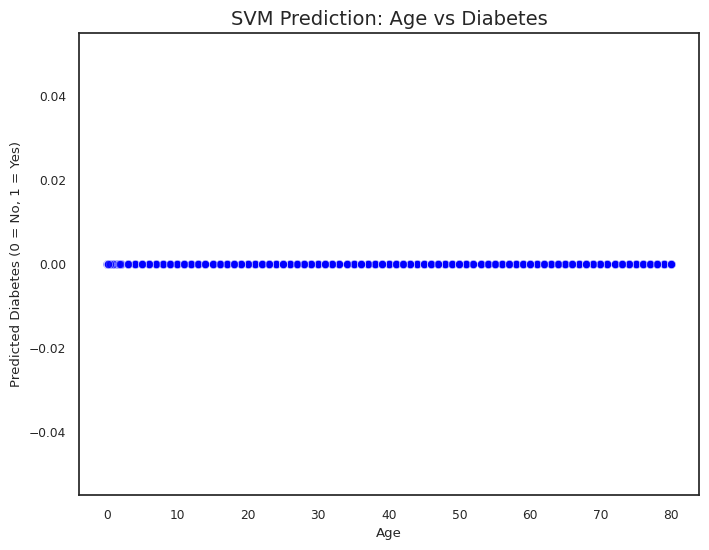

In [ ]:
# Assuming 'df' is your dataframe with a 'diabetes' column and 'age' column
# Preprocessing and splitting the data
X = df[['age']]  # Selecting only the 'age' feature for simplicity
y = df['diabetes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM classifier
svm = SVC(kernel='linear')  # Linear kernel for simplicity
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Accuracy: ", accuracy)

# Plot the correlation between age and diabetes prediction
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['age'], y=y_pred, color='blue', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Predicted Diabetes (0 = No, 1 = Yes)')
plt.title('SVM Prediction: Age vs Diabetes', fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
svm_predicted = svm.decision_function(X_test) > -220
confusion = confusion_matrix(y_test, svm_predicted)
print(confusion)

Random forest tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

rfc = RandomForestClassifier().fit(x_train, y_train)
rfc_predicted = rfc.predict(x_test)

rfc_accuracy =rfc.score(x_test, y_test)
rfc_recall = recall_score(y_test, rfc_predicted)
rfc_precision = precision_score(y_test, rfc_predicted)
print(f"Accuracy:{rfc_accuracy},recall:{rfc_recall}, percision:{rfc_precision}")



Accuracy:0.9673358993030271,recall:0.6696061140505585, percision:0.9452282157676348


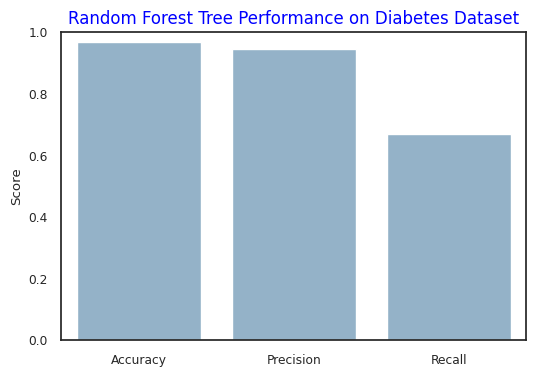

In [ ]:
# Predict
y_pred = rfc.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

# Plot all metrics
plt.figure(figsize=(6, 4))
sns.barplot(x=metrics, y=values)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Random Forest Tree Performance on Diabetes Dataset', color='blue', fontsize=12)
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(x_train, y_train)
dtc_predicted = dtc.predict(x_test)

dtc_accuracy =dtc.score(x_test, y_test)
dtc_recall = recall_score(y_test, dtc_predicted)
dtc_precision = precision_score(y_test, dtc_predicted)
print(f"Accuracy:{accuracy},recall:{recall}, percision:{precision}")

Accuracy:0.9673358993030271,recall:0.6696061140505585, percision:0.9452282157676348


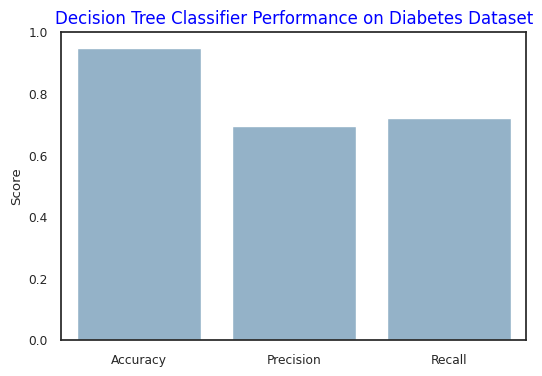

In [ ]:
# Predict
y_pred = dtc.predict(x_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

# Plot all metrics
plt.figure(figsize=(6, 4))
sns.barplot(x=metrics, y=values)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Decision Tree Classifier Performance on Diabetes Dataset', color='blue', fontsize=12)
plt.show()

In [ ]:
# Step 1: Prepare data
# Assuming 'df' is your DataFrame and it has 'age' and 'diabetes' columns
X = df[['age']]
y = df['diabetes']

# Scale the age for better logistic regression performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y)

# Step 3: Generate prediction points across the age range
age_range = np.linspace(X['age'].min(), X['age'].max(), 300).reshape(-1, 1)
age_range_scaled = scaler.transform(age_range)
predicted_prob = model.predict_proba(age_range_scaled)[:, 1]

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.scatter(X['age'], y, alpha=0.3, label='Data (0=No Diabetes, 1=Diabetes)')
plt.plot(age_range, predicted_prob, color='red', linewidth=2, label='Logistic Regression Curve')
plt.xlabel('Age')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression: Age vs Probability of Diabetes', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'StandardScaler' is not defined

Accuracy comparision

In [ ]:
algorithmPerfomanceDict = {
    'LogisticRegression': {'Accuracy': lr_accuracy, 'Precision': lr_precision, 'Recall': lr_recall},
    'KNeighborsClassifier': {'Accuracy': knn_accuracy, 'Precision': knn_precision, 'Recall': knn_recall},
    'SVC': {'Accuracy': svm_accuracy, 'Precision': svm_precision, 'Recall': svm_recall},
    'RandomForestClassifier': {'Accuracy': rfc_accuracy, 'Precision': rfc_precision, 'Recall': rfc_recall},
    'DecisionTreeClassifier': {'Accuracy': dtc_accuracy, 'Precision': dtc_precision, 'Recall': dtc_recall}
}

In [ ]:

comparisonData = pd.DataFrame.from_dict(
    algorithmPerfomanceDict,
    orient='index',
    columns=["Accuracy", "Precision", "Recall"]
)

comparisonData.head(10)

,Accuracy,Precision,Recall
LogisticRegression,0.939561,0.839849,0.391534
KNeighborsClassifier,0.952356,0.879961,0.534392
SVC,0.945542,1.000000,0.384480
RandomForestClassifier,0.967336,0.945228,0.669606
DecisionTreeClassifier,0.947051,0.693265,0.720165


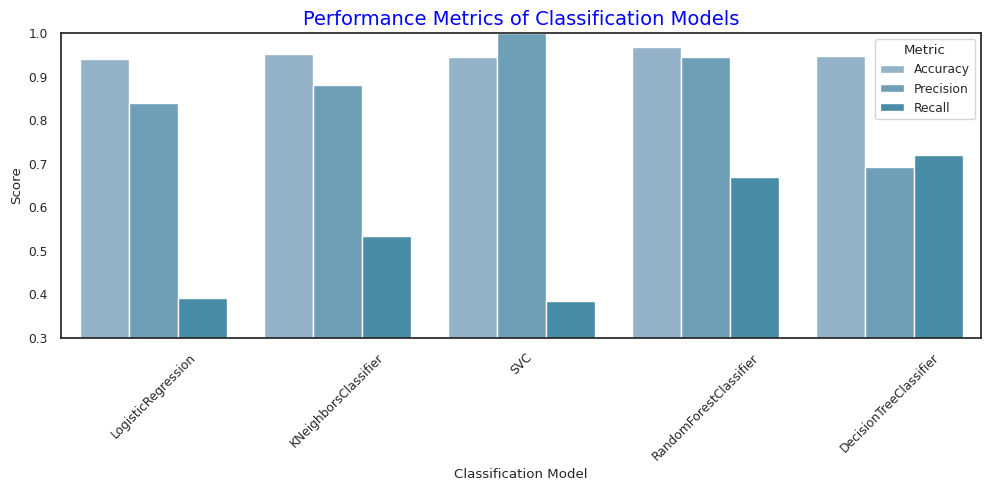

In [ ]:
comparisonData_melted = comparisonData.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
comparisonData_melted.rename(columns={'index': 'Model'}, inplace=True)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=comparisonData_melted, x='Model', y='Score', hue='Metric')
plt.ylabel('Score')
plt.xlabel('Classification Model')
plt.title('Performance Metrics of Classification Models', color='blue', fontsize=14)
plt.ylim(0.3, 1.0)  # Adjust as needed to zoom
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()